In [42]:
#This segment verifies the setup
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
from sklearn.datasets import load_sample_image


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [43]:
#Functions for showing BW images
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

#Function to show color image
def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [44]:
import numpy as np

# Load sample images
china_original=load_sample_image("china.jpg")
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

print (images.shape)

(2, 427, 640, 3)


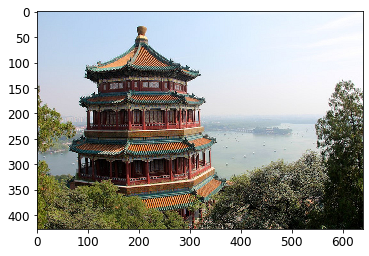

In [45]:
plt.imshow(china_original)

In [46]:
small = china_original[150:200, 100:300,:]

In [47]:
small.shape

(50, 200, 3)

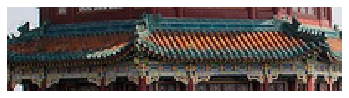

In [48]:
plot_image(small)

In [49]:
china_original.shape

(427, 640, 3)

In [50]:
grey_scale = china_original.sum(axis=2)/3

In [51]:
grey_scale.shape

(427, 640)

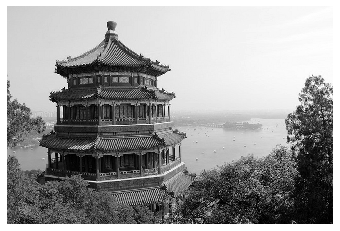

In [52]:
plot_image(grey_scale)

In [53]:
plot_image(grey_scale.reshape(-1).reshape(40, -1))

In [54]:
grey_scale.shape

(427, 640)

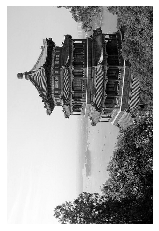

In [55]:
plot_image(grey_scale.T)

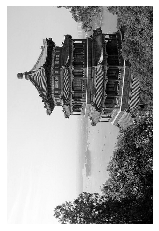

In [56]:
plot_image(grey_scale.T)

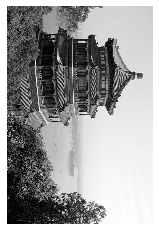

In [57]:
plot_image(grey_scale.T[:,::-1])

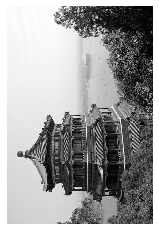

In [58]:
plot_image(grey_scale.T[::-1,:])

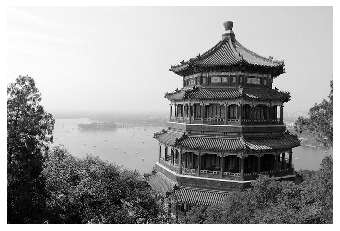

In [59]:
plot_image(grey_scale[:,::-1])

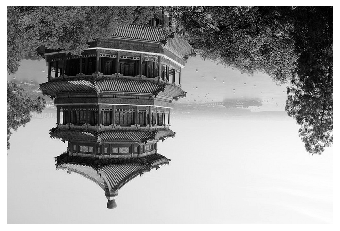

In [60]:
plot_image(grey_scale[::-1,:])

In [61]:
def frame_pic(pic, brd, colr):
    sh = pic.shape 
    fr = brd//2
    new_sh = sh[0] + brd, sh[1] + brd
    new_img = np.full(new_sh, colr)
    new_img[fr:-fr, fr:-fr] = pic
    return new_img

In [62]:
f = frame_pic(grey_scale, 10, 0)
f1 = frame_pic(f, 4, 255)
f2 = frame_pic(f1, 10, 0)

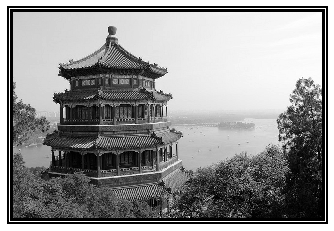

In [63]:
plot_image(f2)

In [64]:
# How to rotate this image
# How to downscale this image
# How to upscale this image

In [65]:
# How to downscale this image


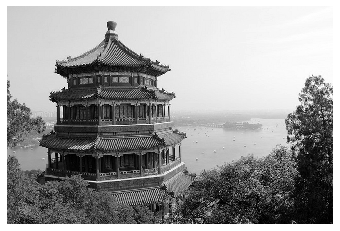

In [66]:
plot_image(grey_scale)

(107, 160)


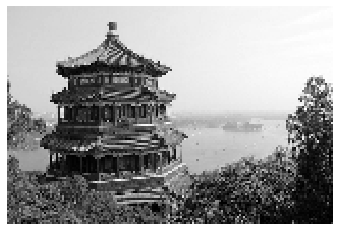

In [67]:
ds_grey_scale = grey_scale[::4, ::4]
print(ds_grey_scale.shape)
plot_image(ds_grey_scale)

In [68]:
arr = np.arange(16).reshape(-1, 4)

In [69]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [70]:
arr[0::2, 1::2]

array([[ 1,  3],
       [ 9, 11]])

In [71]:
np.sum([[1,2], [1,2]])

6

In [72]:
np.array([[1,2], [2, 3]])* np.array([[1, 0], [1, 0]])

array([[1, 0],
       [2, 0]])

In [73]:
def conv_my(in_img, win, skip, ff = None):
    w, h = in_img.shape
    counts = win*win
    result = []
    if ff is None:
        ff = np.ones((win, win))
    for i in range(0, w, skip):
        row = []
        for j in range(0, h, skip):
            win1 = np.sum(in_img[i:i+win, j:j+win]*ff)
            row.append(win1/counts)
        result.append(row)
    return np.array(result)

In [74]:
arr = np.arange(81).reshape(-1, 9)

In [75]:
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [76]:
arr1 = conv_my(arr, 3, 3, np.array([[1, 0, 1], [1, 0, 1], [1, 0, 1]]))

In [77]:
arr1

array([[ 6.66666667,  8.66666667, 10.66666667],
       [24.66666667, 26.66666667, 28.66666667],
       [42.66666667, 44.66666667, 46.66666667]])

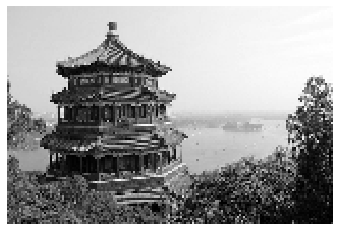

In [80]:
plot_image(ds_grey_scale)

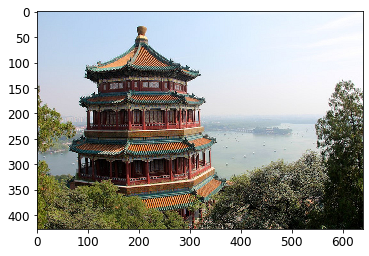

In [83]:
plt.imshow(china)

### Create BW image with np mean

In [84]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print("Shape of x: ",x.shape)
y = x[:, np.newaxis]
print("y:", y)
print("shape of y: ", y.shape)

Shape of x:  (10,)
y: [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
shape of y:  (10, 1)


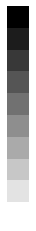

In [85]:
plot_image(y)

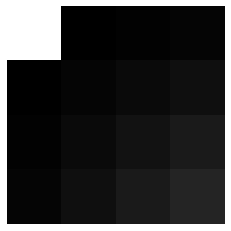

In [86]:
x = np.array([[100, 2, 3, 4], [2, 4, 6, 8], [3, 6, 9, 12], [4, 8, 12, 16]])
plot_image(x)

In [87]:
sd, mean =  np.std(x), np.mean(x)
xx = (x - mean)/sd

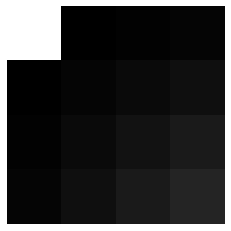

In [88]:
plot_image(xx)

In [89]:
z = x[np.newaxis, :]
print("z: ", z)
print("shape of z: ", z.shape)

z:  [[[100   2   3   4]
  [  2   4   6   8]
  [  3   6   9  12]
  [  4   8  12  16]]]
shape of z:  (1, 4, 4)


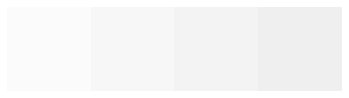

In [90]:
plot_image(z)

Shape after averaging (427, 640)
Shape after adding dimension (427, 640, 1)


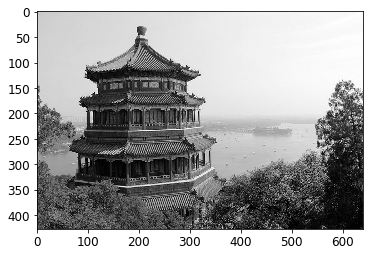

In [91]:
#Averaging the image along the axis=2 or the color channel giving effective BW image
china_bw=np.mean(china_original, axis=2)
print ("Shape after averaging", china_bw.shape)

#Adding an extra dimension to convert the 2D image to a 3D image 
china_bw=china_bw[:,:, np.newaxis]
print ("Shape after adding dimension",china_bw.shape)


plt.imshow(china_bw[:,:,0], cmap="gray")
#Creating a batch with the image to process later
images_bw=np.array([china_bw])

### Understanding numpy array functions for filters

In this section we study the simple function on 2 D arrays, because they are easier to visualise than 4D or larger arrays

In [92]:
#We will create an empty np array in 2D for understanding np array
np_array_2d=np.zeros(shape=(7, 7), dtype=np.float32)
print (np_array_2d.shape)

(7, 7)


In [93]:
print (np_array_2d)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [94]:
#Create a fill centre with 1
np_array_2d=np.zeros(shape=(7, 7), dtype=np.float32)
np_array_2d[3,:]=1
print (np_array_2d)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


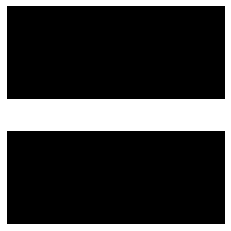

In [95]:
#Check how it looks
plot_image(np_array_2d)

In [96]:
#The step method of assigning 1 in a row if done with for loops would look like this
#This is longer and gets more cumbersome if dimensions increase
for i in range(len(np_array_2d[0])):
    np_array_2d[3][i] = 1
    
print (np_array_2d)    


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


### Single Filter on a B/W image

We use 4D arrays like in the example to operate filters on multiple channels

In [98]:
#We will create a vertical filter first
vertical_filter = np.zeros(shape=(7, 7, 1, 1), dtype=np.float32)
(fh, fw, num_channels, num_filters)=vertical_filter.shape

In [99]:
print ("fh, fw, num_channels, num_filters", fh, fw, num_channels, num_filters)

fh, fw, num_channels, num_filters 7 7 1 1


In [102]:
#Create the vertical filter
vertical_filter[:, 3, :, 0] = 1 

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


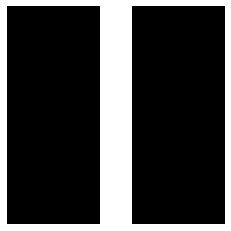

In [103]:
#It is clear if we print one channel at a time
print (vertical_filter[:,:,0,0])
plot_image(vertical_filter[:,:,0,0])

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


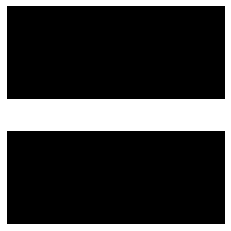

In [106]:
#Same thing with the horizontal filter
horizontal_filter = np.zeros(shape=(7, 7, 1, 1), dtype=np.float32)
horizontal_filter[3,:, :, 0] = 1 
print (horizontal_filter[:,:,0,0])
plot_image(horizontal_filter[:,:,0,0])

In [127]:
vertical_filter.shape

# Width, Height, Channels, #Number of filters

(7, 7, 1, 1)

In [129]:
vertical_filter[0][0][0]

array([0.], dtype=float32)

In [130]:
#Apply convolution 
outputs_vertical = tf.nn.conv2d(images_bw, vertical_filter, strides=1, padding="SAME")
outputs_horizontal = tf.nn.conv2d(images_bw, horizontal_filter, strides=1, padding="SAME")

In [136]:
tf.nn.conv2d?

In [133]:
images_bw.shape

# 1. Batch Size
# 2. Width
# 3. Height
# 4. Channels

(1, 427, 640, 1)

In [ ]:
filter

In [142]:
vertical_filter[0][0][0]

array([0.], dtype=float32)

In [141]:
horizontal_filter[0][0][0]

array([0.], dtype=float32)

In [157]:
images_bw.shape, filter.shape

((1, 427, 640, 1), (7, 7, 1, 2))

In [176]:
filter = np.zeros(shape=(7, 7, 1, 2))
filter[3,:, :, 0] = 1 
filter[:, 3, :, 1] = 1 
outputs = tf.nn.conv2d(images_bw, filter, strides=1, padding="SAME")
outputs.shape
# Apply conv2d on batch of images a batch of filters.

TensorShape([1, 427, 640, 2])

- Total 7 for loops

batch_images x (Number of Filters x Per Channel x W x H x Wf x Hf)

In [165]:
outputs = tf.nn.conv2d(images_bw, filter, strides=1, padding="VALID")
outputs.shape
# Apply conv2d on batch of images a batch of filters.

TensorShape([1, 421, 634, 2])

In [160]:
outputs = tf.nn.conv2d(images_bw, filter, strides=2, padding="SAME")
outputs.shape
# Apply conv2d on batch of images a batch of filters.

TensorShape([1, 214, 320, 2])

In [166]:
outputs = tf.nn.conv2d(images_bw, filter, strides=2, padding="VALID")
outputs.shape
# Apply conv2d on batch of images a batch of filters.

TensorShape([1, 211, 317, 2])

In [167]:
outputs = tf.nn.conv2d(images_bw, filter, strides=4, padding="VALID")
outputs.shape
# Apply conv2d on batch of images a batch of filters.

TensorShape([1, 106, 159, 2])

In [170]:
outputs = tf.nn.conv2d(images_bw, filter, strides=4, padding="SAME")
outputs.shape
# Apply conv2d on batch of images a batch of filters.

TensorShape([1, 107, 160, 2])

In [171]:
outputs.shape

TensorShape([1, 107, 160, 2])

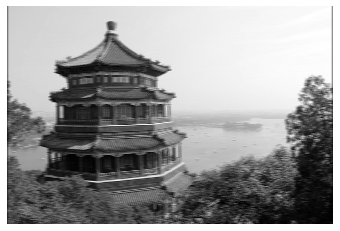

In [154]:
plot_image(outputs[0, :, :, 0])

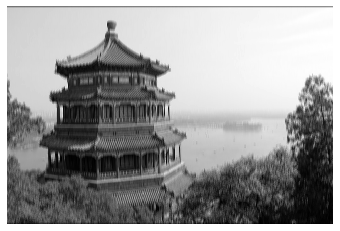

In [155]:
plot_image(outputs[0, :, :, 1])

In [148]:
filter.shape

(7, 7, 1, 1)

In [131]:
outputs_vertical.shape

TensorShape([1, 427, 640, 1])

In [108]:
print (images_bw.shape)
print (outputs_vertical.shape)

(1, 427, 640, 1)
(1, 427, 640, 1)


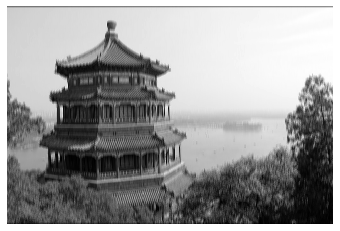

In [109]:
plot_image(outputs_vertical[0,:,:,0])

In [110]:
myfilter = np.ones(shape=(7, 7, 1, 1), dtype=np.float32)


In [111]:
outputs_my = tf.nn.conv2d(images_bw, myfilter, strides=7, padding="SAME")


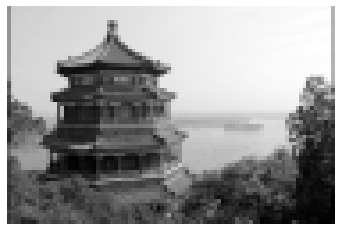

In [112]:
plot_image(outputs_my[0,:,:,0])

In [113]:
images_bw.shape, outputs_my.shape

((1, 427, 640, 1), TensorShape([1, 61, 92, 1]))

WHat do we feed to neural network?
- batches of colored images.

- Black & Image:
    2D
- Colored Image
    3D
- Video
    batch of images - 4D
- Batches of Colored Video
    5D

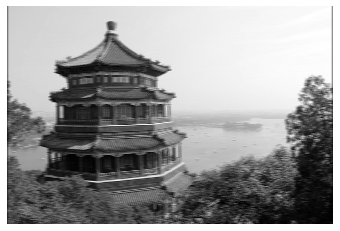

In [115]:
plot_image(outputs_horizontal[0,:,:,0])

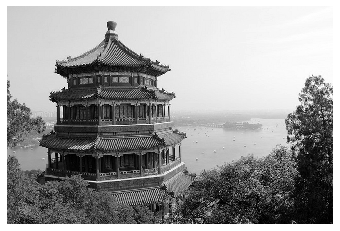

In [116]:
plot_image(images_bw[0,:,:,0])

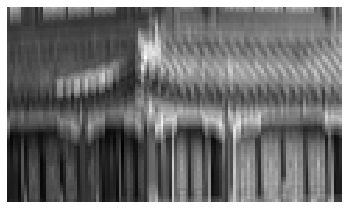

In [117]:
plot_image(outputs_vertical[0, 150:220, 130:250, 0])

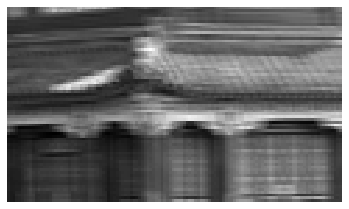

In [118]:
plot_image(outputs_horizontal[0, 150:220, 130:250, 0])

### Same and Valid padding

We will study the how dimensions can reduce due to convolutions and the impact to paddings.

In [119]:
vertical_filter

array([[[[0.]],

        [[0.]],

        [[0.]],

        [[1.]],

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        [[1.]],

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        [[1.]],

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        [[1.]],

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        [[1.]],

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        [[1.]],

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        [[1.]],

        [[0.]],

        [[0.]],

        [[0.]]]], dtype=float32)

In [124]:
outputs_vertical_same_s1 = tf.nn.conv2d(images_bw, vertical_filter, strides=1, padding="SAME")
outputs_vertical_valid_s1 = tf.nn.conv2d(images_bw, vertical_filter, strides=1, padding="VALID")
outputs_vertical_same_s2 = tf.nn.conv2d(images_bw, vertical_filter, strides=2, padding="SAME")
outputs_vertical_valid_s2 = tf.nn.conv2d(images_bw, vertical_filter, strides=2, padding="VALID")
outputs_vertical_valid_s10 = tf.nn.conv2d(images_bw, vertical_filter, strides=10, padding="VALID")
print (outputs_vertical_same_s1.shape)
print (outputs_vertical_valid_s1.shape)
print (outputs_vertical_same_s2.shape)
print (outputs_vertical_valid_s2.shape)
print (outputs_vertical_valid_s10.shape)


(1, 427, 640, 1)
(1, 421, 634, 1)
(1, 214, 320, 1)
(1, 211, 317, 1)
(1, 43, 64, 1)


- Feature maps dimesions (VALID) = (input_size -  filter_size) // stride + 1
- Feature maps dimesions (SAME) = (input_size - 1 )//stride +1
- (f-1)//2 zeros are added on each side of the image to keep dimensions the same

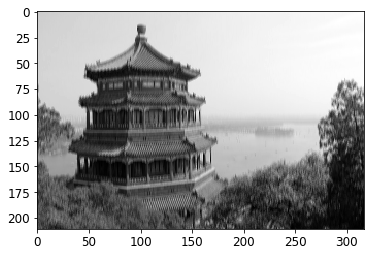

In [125]:
plt.imshow(outputs_vertical_valid_s2[0,:,:,0], cmap="gray")

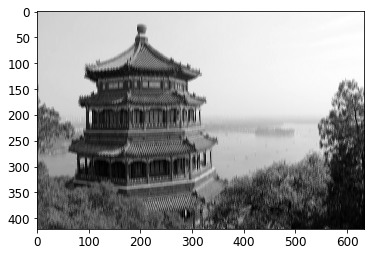

In [123]:
plt.imshow(outputs_vertical_valid_s1[0,:,:,0], cmap="gray")

Note that the most features seem preserved, but the size of the image is reduced to less 1/4.

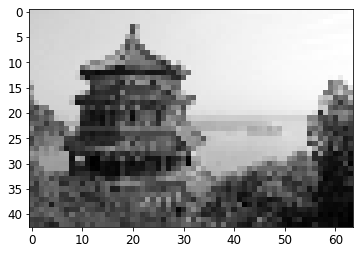

In [26]:
plt.imshow(outputs_vertical_valid_s10[0,:,:,0], cmap="gray")

Note a very large stride will result in loss of information, so a balance must be made between reducing size and keeping information.

### Images with Multiple channels

Each filter will have the same number of channels as the input. The output feature map will have the convolution of the filter across all channels. So each filter will give only 1 feature map. 

In [27]:
#We will now create a filter for every channel
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) #array of only 0'
filters[:, 3, :, 0] = 1  # vertical line for all 3 channels
filters[3, :, :, 1] = 1  # horizontal line for all 3 channels



images shape (2, 427, 640, 3)
outputs shape (2, 427, 640, 2)


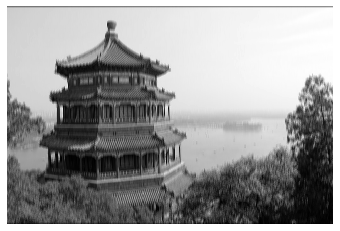

In [28]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
print ("images shape", images.shape)
print ("outputs shape", outputs.shape)
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map
#plt.imshow(outputs[1, :, :, 1]) # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

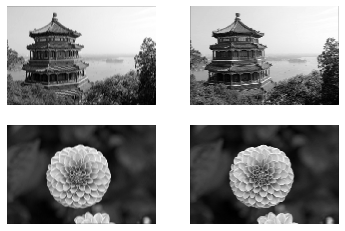

In [29]:
#Routine to the outputs of the whole batch
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

Saving figure china_original


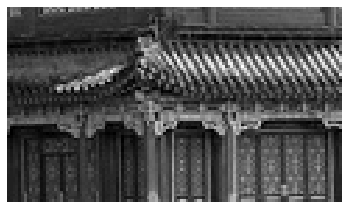

Saving figure china_vertical


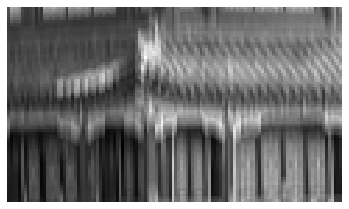

Saving figure china_horizontal


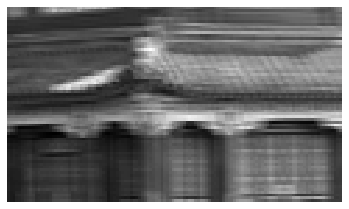

In [30]:
def crop(images):
    return images[150:220, 130:250]

plot_image(crop(images[0, :, :, 0]))
save_fig("china_original", tight_layout=False)
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    save_fig(filename, tight_layout=False)
    plt.show()